In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
%cd "/content/drive/MyDrive/_Immigration LatinX/"

/content/drive/.shortcut-targets-by-id/15qBLFlUf-o-58bi_3Y6CDVFEEswJT6DT/_Immigration LatinX


In [ ]:
df = pd.read_csv('br_data.csv')

In [ ]:
# Took only limited columns of dataset for simplicity
df = df[['Title','Sentiment','City','Engagement Score','Impressions']]
data = df[:500]
df.head()

,Title,Sentiment,City,Engagement Score,Impressions
0,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,positive,"Washington, D.C.",6,745
1,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,negative,"Washington, D.C.",5,745
2,Denver has spent roughly $5 million responding...,neutral,Denver,6,7627
3,Last I looked states in the US have sovereignt...,neutral,Las Vegas,0,5794
4,@NowPammsy I'm thinking about sneaking across ...,neutral,NaN,0,11


In [ ]:
# Take a sample of 200 tweets from the dataset for model input
text = df['Title'].values.tolist()
text = text[:500]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Labels
# 0: Neutral
# 1: Toxic (this includes various forms of hate speech and offensive content)

# Load tokenizer and model
roberta_tokenizer = AutoTokenizer.from_pretrained("facebook/roberta-hate-speech-dynabench-r4-target")
fb_roberta = AutoModelForSequenceClassification.from_pretrained("facebook/roberta-hate-speech-dynabench-r4-target")

# Tokenize the tweets
inputs = roberta_tokenizer(text, padding=True, truncation=True, return_tensors="pt")

# Get model predictions
with torch.no_grad():
    outputs = fb_roberta(**inputs)

# Convert logits to probabilities
probabilities = torch.softmax(outputs.logits, dim=-1)
predictions = torch.argmax(probabilities, dim=-1)

# Display results
data['predicted_class'] = predictions
data.head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/816 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

<ipython-input-6-2fbfe8ba6750>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_class'] = predictions


,Title,Sentiment,City,Engagement Score,Impressions,predicted_class
0,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,positive,"Washington, D.C.",6,745,0
1,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,negative,"Washington, D.C.",5,745,0
2,Denver has spent roughly $5 million responding...,neutral,Denver,6,7627,0
3,Last I looked states in the US have sovereignt...,neutral,Las Vegas,0,5794,0
4,@NowPammsy I'm thinking about sneaking across ...,neutral,NaN,0,11,1


In [ ]:
text[1]

'@Diomendes4 @_JennHunter @jenfrytalks @GNCordova @msolurin Then I gave u another topic which u ignored. It’s ok my guy. The fact that it took so long for a non answer is actually an answer. Now I really feel sorry for ur Hispanic mom & ur fellow immigrants. U can’t even defend them/side with them against Steve King! Wow Self hate is real'

In [ ]:
data.rename(columns={'predicted_class':'Roberta_R4'})

,Title,Sentiment,City,Engagement Score,Impressions,Roberta_R4
0,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,positive,"Washington, D.C.",6,745,0
1,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,negative,"Washington, D.C.",5,745,0
2,Denver has spent roughly $5 million responding...,neutral,Denver,6,7627,0
3,Last I looked states in the US have sovereignt...,neutral,Las Vegas,0,5794,0
4,@NowPammsy I'm thinking about sneaking across ...,neutral,NaN,0,11,1
...,...,...,...,...,...,...
495,‼️ Black migrants were often turned away from ...,negative,Houston,0,1460,0
496,POLL: Fewer Than 3% Of Hispanic Voters Support...,neutral,"Washington, D.C.",0,8059,0
497,Current migrant crisis has become famous for i...,neutral,Houston,0,1460,0
498,African & Invisible: Other New York Migrant Cr...,neutral,Houston,23,76729,0


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

label_mappings = {
    "facebook_roberta": {0: 'Neutral', 1: 'Hate'},
    "hatexplain": {0: 'Hate', 1: 'Neutral', 2: 'Offensive'},
    "distilroberta": {0: 'Hate', 1: 'Offensive', 2: 'Neutral'},
    "cardiff_roberta": {0: "hate_gender", 1: "hate_race", 2: "hate_sexuality",
                        3: "hate_religion", 4: "hate_origin", 5: "hate_disability",
                        6: "hate_age", 7: "Neutral"},
    "dehatebert": {0: 'Neutral', 1: 'Hate'}
}


# Initialize the list of models
models = {
    "facebook_roberta": "facebook/roberta-hate-speech-dynabench-r4-target",
    "hatexplain": "Hate-speech-CNERG/bert-base-uncased-hatexplain",
    "distilroberta": "badmatr11x/distilroberta-base-offensive-hateful-speech-text-multiclassification",
    "cardiff_roberta": "cardiffnlp/twitter-roberta-large-hate-latest",
    "dehatebert": "Hate-speech-CNERG/dehatebert-mono-english",
}

# Modify the run_model function to handle individual label mappings
def run_model(model_name, model_path):
    print(f"Running model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    probabilities = torch.softmax(outputs.logits, dim=-1)
    predictions = torch.argmax(probabilities, dim=-1)

    # Convert the predictions tensor to a list
    predictions_list = predictions.tolist()

    # Use a list comprehension to map the numeric labels to their string representations
    data[model_name] = [label_mappings[model_name][pred] for pred in predictions_list]


# Run all models with a progress bar using tqdm
for model_name, model_path in tqdm(models.items(), desc="Running models"):
    run_model(model_name, model_path)

# Display the DataFrame with text labels for each model's predictions
print(data.head())


Running models:   0%|          | 0/5 [00:00<?, ?it/s]

Running model: facebook_roberta


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
<ipython-input-9-c8a64ae31a85>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[model_name] = [label_mappings[model_name][pred] for pred in predictions_list]
Running models:  20%|██        | 1/5 [10:41<42:44, 641.21s/it]

Running model: hatexplain


tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [ ]:
# Correct label swapping in the DistilRoBERTa column
data['distilroberta'] = data['distilroberta'].replace({'Hate': 'Neutral', 'Neutral': 'Hate'})

# Display the corrected DataFrame
data.head()

<ipython-input-42-bf2a160d234e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distilroberta'] = data['distilroberta'].replace({'Hate': 'Neutral', 'Neutral': 'Hate'})


,Title,Sentiment,City,Engagement Score,Impressions,predicted_class,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,positive,"Washington, D.C.",6,745,0,Neutral,Normal,Neutral,Neutral,Neutral
1,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,negative,"Washington, D.C.",5,745,0,Neutral,Normal,Neutral,Neutral,Hate
2,Denver has spent roughly $5 million responding...,neutral,Denver,6,7627,0,Neutral,Normal,Neutral,Neutral,Neutral
3,Last I looked states in the US have sovereignt...,neutral,Las Vegas,0,5794,0,Neutral,Normal,Neutral,Neutral,Hate
4,@NowPammsy I'm thinking about sneaking across ...,neutral,NaN,0,11,1,Hate,Normal,Neutral,Neutral,Neutral


In [ ]:
data['distilroberta'] = data['distilroberta'].replace({'offensive': 'Offensive'})

<ipython-input-69-2a3ef23f2ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distilroberta'] = data['distilroberta'].replace({'offensive': 'Offensive'})


In [ ]:
# Correct label swapping in the DistilRoBERTa column
data['hatexplain'] = data['hatexplain'].replace({'Normal': 'Neutral'})

# Display the corrected DataFrame
data.head()


<ipython-input-44-23312e0673c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hatexplain'] = data['hatexplain'].replace({'Normal': 'Neutral'})


,Title,Sentiment,City,Engagement Score,Impressions,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,positive,"Washington, D.C.",6,745,Neutral,Neutral,Neutral,Neutral,Neutral
1,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,negative,"Washington, D.C.",5,745,Neutral,Neutral,Neutral,Neutral,Hate
2,Denver has spent roughly $5 million responding...,neutral,Denver,6,7627,Neutral,Neutral,Neutral,Neutral,Neutral
3,Last I looked states in the US have sovereignt...,neutral,Las Vegas,0,5794,Neutral,Neutral,Neutral,Neutral,Hate
4,@NowPammsy I'm thinking about sneaking across ...,neutral,NaN,0,11,Hate,Neutral,Neutral,Neutral,Neutral


In [ ]:
data.to_excel('top_5_models1.xlsx',index=False)

In [ ]:
# Get value counts for the last 5 columns of the DataFrame
for column in data.iloc[:, -5:]:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")


Value counts for facebook_roberta:
facebook_roberta
Neutral    134
Hate        66
Name: count, dtype: int64


Value counts for hatexplain:
hatexplain
Neutral      159
Offensive     40
Hate           1
Name: count, dtype: int64


Value counts for distilroberta:
distilroberta
Neutral      148
Hate          40
offensive     12
Name: count, dtype: int64


Value counts for cardiff_roberta:
cardiff_roberta
Neutral        176
hate_origin     22
hate_race        2
Name: count, dtype: int64


Value counts for dehatebert:
dehatebert
Hate       114
Neutral     86
Name: count, dtype: int64




In [ ]:
from sklearn.metrics import cohen_kappa_score
import json

# Select only the last 5 columns
last_5_columns = data.columns[-5:]

kappa_scores = {}
model_pairs = [(model1, model2) for i, model1 in enumerate(last_5_columns) for model2 in last_5_columns[i+1:]]

for model1, model2 in model_pairs:
    kappa_scores[f"{model1} vs {model2}"] = cohen_kappa_score(data[model1], data[model2])

# Print the Kappa scores between model pairs
print(json.dumps(kappa_scores, indent = 4))


{
    "facebook_roberta vs hatexplain": 0.07665879321451574,
    "facebook_roberta vs distilroberta": 0.07576449109995431,
    "facebook_roberta vs cardiff_roberta": 0.11062378167641329,
    "facebook_roberta vs dehatebert": 0.14089347079037795,
    "hatexplain vs distilroberta": 0.08692476260043824,
    "hatexplain vs cardiff_roberta": 0.13448735019973368,
    "hatexplain vs dehatebert": 0.0843888295437204,
    "distilroberta vs cardiff_roberta": 0.09690366972477071,
    "distilroberta vs dehatebert": 0.11940824233885172,
    "cardiff_roberta vs dehatebert": 0.06692406692406683
}


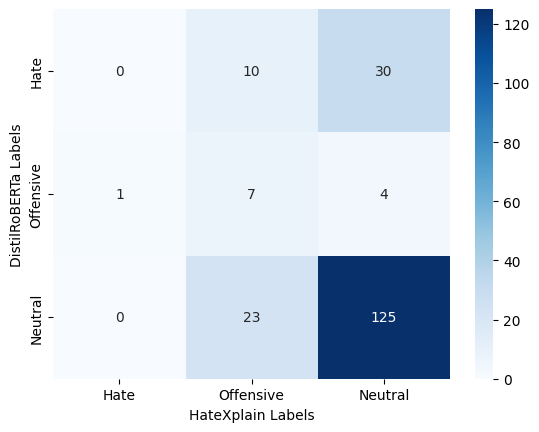

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the string labels you are using in your data
label_names = ['Hate', 'Offensive', 'Neutral']

# Compute the confusion matrix using string labels
cm = confusion_matrix(data['distilroberta'], data['hatexplain'], labels=label_names)

# Create the heatmap with label names on the axes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names)

plt.xlabel('HateXplain Labels')
plt.ylabel('DistilRoBERTa Labels')
plt.show()


In [ ]:
data = pd.read_excel('top_5_models1.xlsx')

In [ ]:
data.head()

,Title,Sentiment,City,Engagement Score,Impressions,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,positive,"Washington, D.C.",6,745,Neutral,Neutral,Neutral,Neutral,Neutral
1,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,negative,"Washington, D.C.",5,745,Neutral,Neutral,Neutral,Neutral,Hate
2,Denver has spent roughly $5 million responding...,neutral,Denver,6,7627,Neutral,Neutral,Neutral,Neutral,Neutral
3,Last I looked states in the US have sovereignt...,neutral,Las Vegas,0,5794,Neutral,Neutral,Neutral,Neutral,Hate
4,@NowPammsy I'm thinking about sneaking across ...,neutral,NaN,0,11,Hate,Neutral,Neutral,Neutral,Neutral


In [ ]:
data.to_excel('Hate Speech Models.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/_Immigration LatinX'

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/15qBLFlUf-o-58bi_3Y6CDVFEEswJT6DT/_Immigration LatinX


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('Models on Brandwatch Data.xlsx')
df.head()

,Title,Sentiment,City,Engagement Score,Impressions,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,positive,"Washington, D.C.",6,745,Neutral,Neutral,Neutral,Neutral,Neutral
1,@Diomendes4 @_JennHunter @jenfrytalks @GNCordo...,negative,"Washington, D.C.",5,745,Neutral,Neutral,Neutral,Neutral,Hate
2,Denver has spent roughly $5 million responding...,neutral,Denver,6,7627,Neutral,Neutral,Neutral,Neutral,Neutral
3,Last I looked states in the US have sovereignt...,neutral,Las Vegas,0,5794,Neutral,Neutral,Neutral,Neutral,Hate
4,@NowPammsy I'm thinking about sneaking across ...,neutral,NaN,0,11,Hate,Neutral,Neutral,Neutral,Neutral


In [ ]:
df.replace({'Offensive': 'Hate'}, inplace=True)

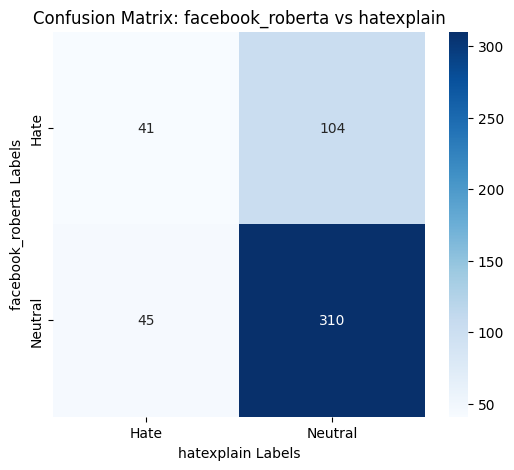

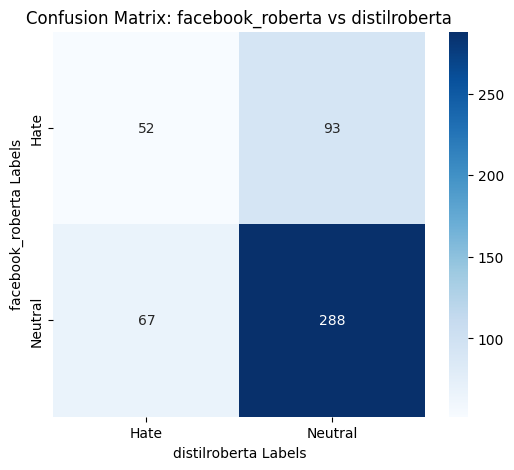

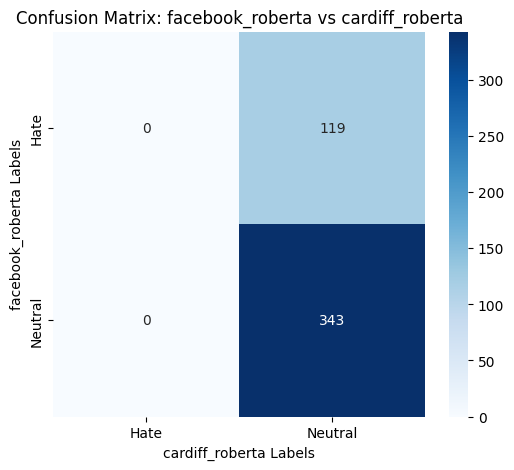

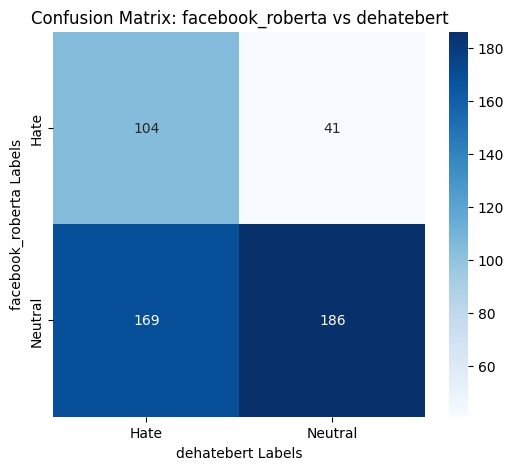

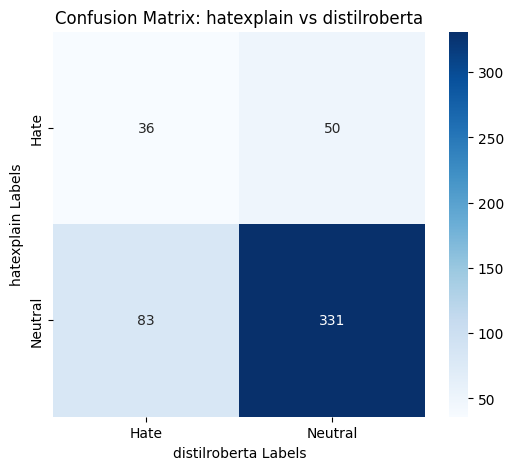

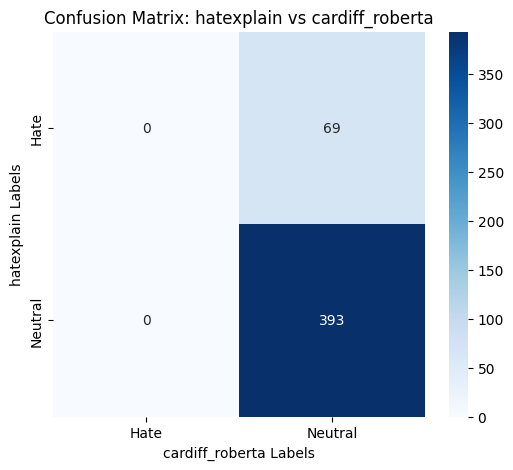

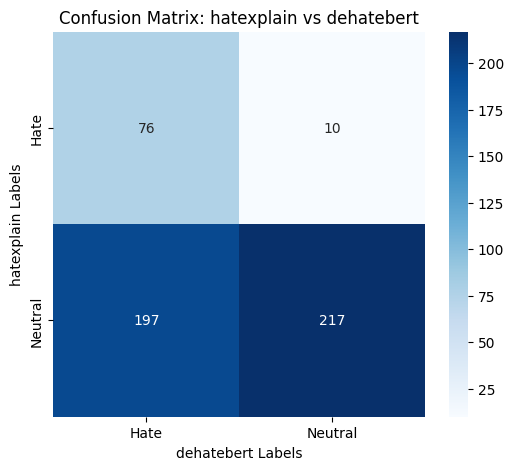

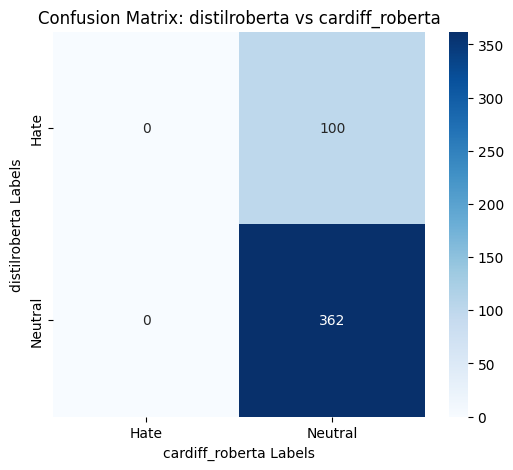

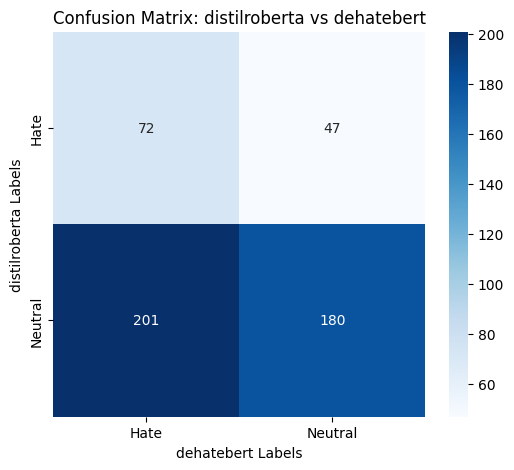

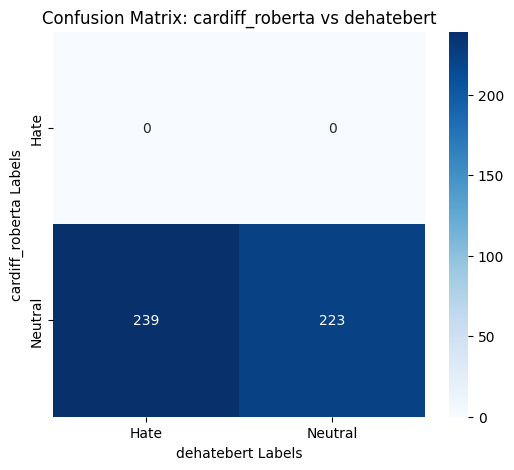

Cohen's Kappa Scores:
                                 index  Cohen's Kappa
0       (facebook_roberta, hatexplain)       0.177341
1    (facebook_roberta, distilroberta)       0.179403
2  (facebook_roberta, cardiff_roberta)       0.087103
3       (facebook_roberta, dehatebert)       0.191250
4          (hatexplain, distilroberta)       0.189341
5        (hatexplain, cardiff_roberta)       0.089083
6             (hatexplain, dehatebert)       0.219127
7     (distilroberta, cardiff_roberta)       0.067290
8          (distilroberta, dehatebert)       0.053623
9        (cardiff_roberta, dehatebert)       0.045657

Agreement Rates:
                                 index  Agreement Rate
0       (facebook_roberta, hatexplain)           0.702
1    (facebook_roberta, distilroberta)           0.680
2  (facebook_roberta, cardiff_roberta)           0.686
3       (facebook_roberta, dehatebert)           0.580
4          (hatexplain, distilroberta)           0.734
5        (hatexplain, cardiff_robert

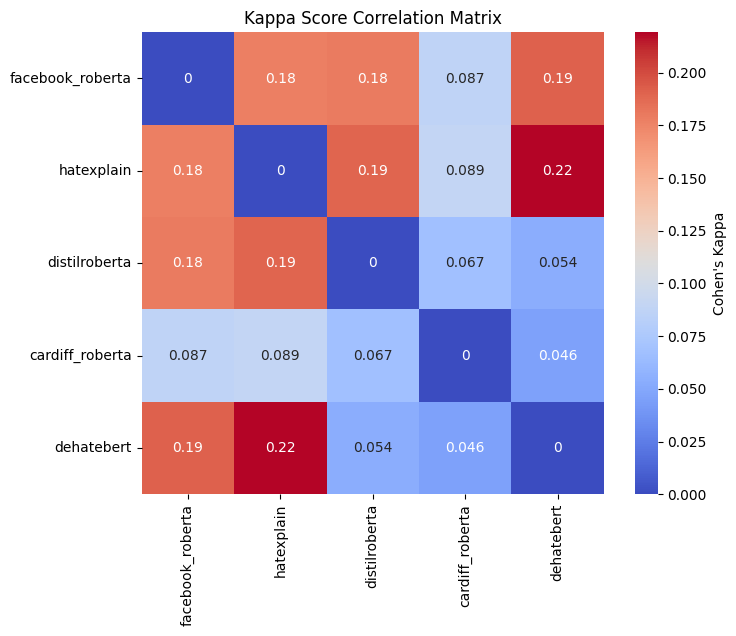

In [ ]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `data` is your DataFrame containing predictions for each model
model_columns = ['facebook_roberta', 'hatexplain', 'distilroberta', 'cardiff_roberta', 'dehatebert']
label_names = ['Hate', 'Neutral']

# Initialize dictionaries to store Cohen's Kappa and agreement rates for each pair
kappa_scores = {}
agreement_rates = {}

# Compute pairwise metrics for each model combination
for i, model1 in enumerate(model_columns):
    for model2 in model_columns[i+1:]:
        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(df[model1], df[model2])
        kappa_scores[(model1, model2)] = kappa

        # Calculate Agreement Rate
        agreement = np.mean(df[model1] == df[model2])
        agreement_rates[(model1, model2)] = agreement

        # Compute and plot the confusion matrix for each model pair
        cm = confusion_matrix(df[model1], df[model2], labels=label_names)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=label_names, yticklabels=label_names)
        plt.xlabel(f'{model2} Labels')
        plt.ylabel(f'{model1} Labels')
        plt.title(f'Confusion Matrix: {model1} vs {model2}')
        plt.show()

# Convert kappa_scores and agreement_rates to DataFrames for easier visualization
kappa_df = pd.DataFrame.from_dict(kappa_scores, orient='index', columns=['Cohen\'s Kappa']).reset_index()
agreement_df = pd.DataFrame.from_dict(agreement_rates, orient='index', columns=['Agreement Rate']).reset_index()

# Print Kappa and Agreement Tables
print("Cohen's Kappa Scores:")
print(kappa_df)
print("\nAgreement Rates:")
print(agreement_df)

# Plot Correlation Matrix for Kappa Scores
kappa_matrix = pd.DataFrame(np.zeros((len(model_columns), len(model_columns))),
                            index=model_columns, columns=model_columns)
for (model1, model2), kappa in kappa_scores.items():
    kappa_matrix.loc[model1, model2] = kappa
    kappa_matrix.loc[model2, model1] = kappa  # fill symmetrically

plt.figure(figsize=(8, 6))
sns.heatmap(kappa_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'label': "Cohen's Kappa"})
plt.title("Kappa Score Correlation Matrix")
plt.show()
